In [1]:
%config IPCompleter.greedy=True
import numpy as np

In [2]:
#(1/2)x^TQx + q^Tx
def quadratic(Q, b, x):
    r = 0.5 * x.T.dot( np.dot(Q, x) ) + b.T.dot(x)
    return r
    
    
def quadratic_grad(Q, b, x):
    r = Q.dot(x) + b
    return r

In [166]:
def func(z):
    x = z[0]
    y = z[1]
    r = (x+2*y-7)*(x+2*y-7)+ (2*x+y-5)*(2*x+y-5)
    return r

In [167]:
def der(z):
    x = z[0]
    y = z[1]
    r = np.zeros((2,))
    r[0] = 4*(-5 + 2*x + y) + 2*(-7 + x + 2*y)
    r[1] = 2*(-5 + 2*x + y) + 4*(-7 + x + 2*y)
    return r

In [168]:
def descent_step(t, x, grad):
    xk = x  - t * grad
    return xk

In [161]:
#performs elementary gradient descent for a quadratic function minimization problem
#and returns an array with convergence
def run_gradient_descent_conv(alpha, steps, x0, Q, b, xstar):
    lambdamax = np.max( np.linalg.eigvals(Q) )
    print(np.linalg.eigvals(Q))
    x = x0
    
    dists = [] #distances from the true crit pt
    fvals = [] #function value at the current point
    
    for k in range(steps):
        grad = quadratic_grad(Q, b, x)
        xk = descent_step(alpha, x, grad)
        
        dists.append( np.linalg.norm(x - xstar))
        fvals.append( quadratic(Q, b, x) )
        x = xk
    return [dists, fvals]

In [67]:
#performs elementary gradient descent for a quadratic function minimization problem
#saves the computed trajectory
def run_gradient_descent_traj(alpha, steps, x0, Q, b, xstar):
    lambdamax = np.max( np.linalg.eigvals(Q) )
    x = x0
    
    traj = [] #computed trajectory
    
    for k in range(steps):
        grad = quadratic_grad(Q, b, x)
        xk = descent_step(alpha, x, grad)
        x = xk
        traj.append(x)
        
    return np.vstack(traj)

In [169]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

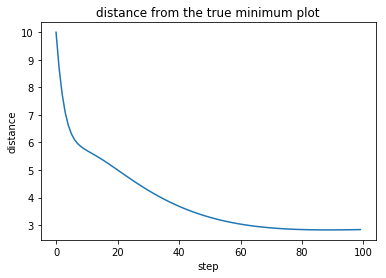

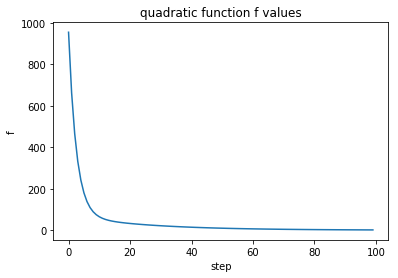

In [176]:
x = np.array([0, -10])
alpha = 0.01
steps = 100
dists = []
fvals = [] 

for k in range(steps):
    grad = der( x )
    xk = descent_step(alpha, x, grad)

    dists.append( np.linalg.norm(x))
    fvals.append( func( x) )
    x = xk

plt.plot(dists)
plt.title("distance from the true minimum plot")
plt.xlabel("step")
plt.ylabel("distance")
plt.show()
plt.plot(fvals)
plt.title("quadratic function f values")
plt.xlabel("step")
plt.ylabel("f")
plt.show()




In [69]:
#define the quadratic function
Q = np.array([[1, 0.5], [0.5, 2]])
b = np.array([1, 1])
xstar = -np.dot(np.linalg.inv(Q), b)

[-0.85714286 -0.28571429]


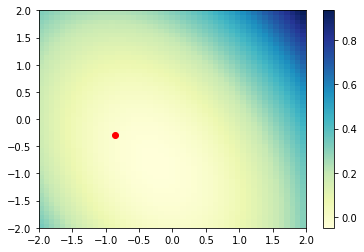

In [70]:
#compute the heat map of the function
nrpts = 50
xs = np.linspace(-2, 2, num = nrpts)
ys = np.linspace(-2, 2, num = nrpts)

heatmap = np.zeros((50, 50), dtype = float)
for i in range(50):
    for j in range(50):
        heatmap[i,j] = quadratic(Q, b, np.array([xs[i], ys[j]]))
heatmap = heatmap / np.max(np.max(heatmap))

cmap = plt.get_cmap('YlGnBu')
fig, ax = plt.subplots()
xsf = np.meshgrid(xs, ys)[0]
ysf = np.meshgrid(xs, ys)[1]
im = ax.pcolormesh(xsf, ysf, heatmap, cmap=cmap )
fig.colorbar(im, ax=ax)
print(xstar)
plt.plot(xstar[0], xstar[1], 'ro')
plt.show()

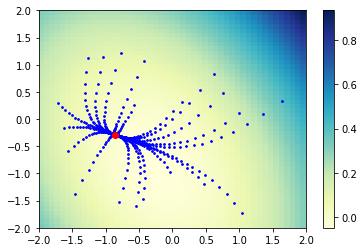

In [71]:
#computes a trajectory from a random point

steps = 50
alpha = 0.1

trajects = []
for i in range(20):
    x0 = -2 + np.random.random((2,))*4
    trajects.append( run_gradient_descent_traj(alpha, steps, x0, Q, b, xstar) )

cmap = plt.get_cmap('YlGnBu')
fig, ax = plt.subplots()
xsf = np.meshgrid(xs, ys)[0]
ysf = np.meshgrid(xs, ys)[1]
im = ax.pcolormesh(xsf, ysf, heatmap, cmap=cmap )
fig.colorbar(im, ax=ax)
#print(result)
for i in range(20):
    plt.scatter(trajects[i][:,0], trajects[i][:,1], s=3, c='b')

plt.plot(xstar[0], xstar[1], 'ro')
plt.show()

[0.79289322 2.20710678]


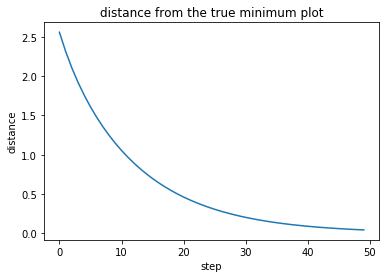

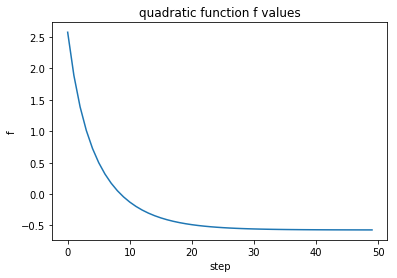

In [72]:
#for a fixed learning rate 0.1 
#plot of the distances from the true minimum
#and the quadratic function values
x0 = -2 + np.random.random((2,))*4

steps = 50
alpha = 0.1
dists, fvals = run_gradient_descent_conv(alpha, steps, x0, Q, b, xstar)

plt.plot(dists)
plt.title("distance from the true minimum plot")
plt.xlabel("step")
plt.ylabel("distance")
plt.show()
plt.plot(fvals)
plt.title("quadratic function f values")
plt.xlabel("step")
plt.ylabel("f")
plt.show()

[0.79289322 2.20710678]
[0.79289322 2.20710678]
[0.79289322 2.20710678]
[0.79289322 2.20710678]
[0.79289322 2.20710678]


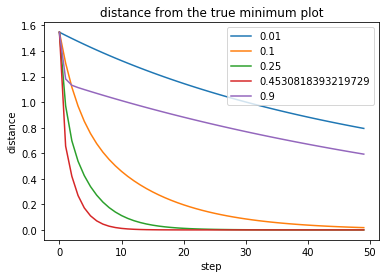

In [119]:
#comparision of different learning rates
#
#
x0 = -2 + np.random.random((2,))*4

steps = 50
alphas = [0.01, 0.1, 0.25, 1./np.max(np.linalg.eigvals(Q)), 0.9]
alphaconvs = []

for alpha in alphas:
    dists, fvals = run_gradient_descent_conv(alpha, steps, x0, Q, b, xstar)
    alphaconvs.append(dists)

for idx, dists in enumerate(alphaconvs):
    plt.plot(dists, label=(str)(alphas[idx]))
plt.title("distance from the true minimum plot")
plt.xlabel("step")
plt.ylabel("distance")
plt.legend()
plt.show()

[0.79289322 2.20710678]
[  0.95961244 100.04038756]


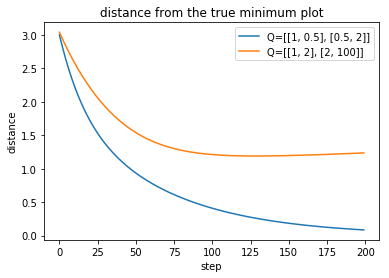

[  0.95961244 100.04038756   4.97948934 200.02051066]


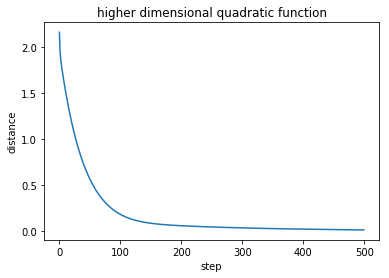

In [115]:
#example of a higher dimensional quadratic f
Qh = np.array( [ [1, 2, 0, 0], [2, 100, 0, 0], [0, 0, 5, 2], [0, 0, 2, 200] ] )
bh = np.array([1, 1, 1, 1])
xstarh = -np.dot( np.linalg.inv(Qh), bh )
x0 = -2 + np.random.random((4,))*4
steps = 500
alpha = 0.005

distsh, fvalsh = run_gradient_descent_conv(alpha, steps, x0, Qh, bh, xstarh)
plt.plot(distsh)
plt.title("higher dimensional quadratic function")
plt.xlabel("step")
plt.ylabel("distance")
plt.legend()
plt.show()